Tratamento do Dataset

In [ ]:
# Bibliotecas 
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
data=pd.read_csv('train.csv') # dataset do projeto

#### data INFO

In [ ]:
# data.dtypes
data.info() #milage
# data.head()
# data.tail()
# data.shape #(3207, 12)
# data.nunique() # valores unicos para cada coluna

In [ ]:
# modelo mais antigo e mais novo:
antigo=data['model_year'].min()
novo=data['model_year'].max()
print(antigo,novo)

#### correção: 'milage' -> INT

In [ ]:
#milage:
valores_corrigidos=[]
for milage in data['milage']: # para cada quilometragem do dataset
    separa=re.split(r'[ ]',milage) # sepagar o numero do mi
    numero=separa[0] # numero
    letra=separa[1] # mi
    verifica=re.search(r'^[0-9]+[,]?[0-9]+$',numero) # verifica se o numeros sao sempre iguais(com casas decimais ou não)
    verifica2=re.search(r'^mi\.$',letra) # verifica se a letra é sempre mi
    if verifica and verifica2: # se seguir o padra numero + mi:
        numero=int(re.sub(r',','',numero)) # retira a , dos numeros e passa para inteiro ( estavam em obj)
        valores_corrigidos.append(numero)
    else: 
        print(milage,False) # tem dados diferentes no dataset

data['milage']=valores_corrigidos

In [ ]:
#verificaçao
for m in data['milage']:
    if not isinstance(m, (int)):
        print('dado incorreto')
# tudo certo

In [ ]:
data.describe()

#### NULL's

In [ ]:
data.isnull().sum()

#### counts

In [ ]:
data['fuel_type'].value_counts() # –  38 ( existem 38 linhas com (-) -> nao se sabe)
data['accident'].value_counts()
data['clean_title'].value_counts() # Yes -> 2740, os restantes são valores nulos (nan)
# data['clean_title'].unique()
# verificar outros tipos de dizer valores nulos: ( como (-) por exemplo)
data['brand'].value_counts() # tudo certo
data['model'].value_counts() # tudo certo
data['model_year'].value_counts() # tudo certo
data['engine'].value_counts() # – 38 -> nao se sabe
data['transmission'].value_counts() # 4 -> nao se sabe 
data['ext_col'].value_counts()# 11 -> nao se sabe
data['int_col'].value_counts() # 98 -> nao se sabe
for preco in data['price']: # tudo certo
    if not isinstance(preco, int):
        print('erro')

In [ ]:
len(data['milage'])
# len(data['milage'].unique())

##### --> nº de velocidades na transmissão existentes no dataset

In [ ]:
d2=list(data['transmission'].unique())
alls = [int(numero) for string in d2 for numero in re.findall(r'\d+', string)]
list(set(alls))

#### verificar significado de '-' e NaN para o tipo de combustível

In [ ]:
len(data.loc[data['fuel_type'] == '–'])

In [ ]:
data.loc[(data['fuel_type'] == '–') & (data['engine'] != '–')] 

###### OS CARROS PARA OS QUAIS O FUEL_TYPE É '-' NÃO INDICADO, TAMBÉM NÃO SE CONHECE A CONFIGURAÇÃO DO MOTOR

In [ ]:
# VERIFICAR QUE OS CARROS COM NAN NO TIPO DE COMBUSTÍVEL SÃO CARROS ELÉTRICOS
elec=data[data['fuel_type'].isnull()]
pattern = re.compile(r'\bElectric\b', flags=re.IGNORECASE)
contains_electric = elec['engine'].str.contains(pattern, na=False)
# Selecionar todas as linhas que não contêm 'Electric' na coluna 'engine'
elec[~contains_electric]
# elec[contains_electric].head(10)

###### os carros com NaN para 'fuel_type' são carros elétricos
Tesla --> elétrico
Standard Range Battery --> elétrico
111.2Ah / FR 70kW / RR 160kW (697V) --> especificidade de baterias

### gráficos

#### BOXPLOT

In [ ]:
data.plot(kind='box',figsize=(15,6),subplots=True) # grafico do codigo acima

In [ ]:
data[data['model_year']<1990] # outlier do 1º gráfico

In [ ]:
data[data['milage']>350000] # outlier do 2º gráfico

In [ ]:
data[data['price']>1500000] # outlier 3º gráfico

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'data' seja seu DataFrame com colunas de atributos e 'preco'
# Vamos calcular a média do preço para cada atributo (exceto a última coluna)
data['fuel_type'].fillna('Elétrico', inplace=True)

# Lista para armazenar os gráficos gerados
colunas = ['brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
num_linhas = 3
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(colunas[:-1]):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(10)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='deepskyblue')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()


#### análise dos modelos com preço mais altos

In [ ]:
d=data.sort_values(by='price', ascending=False).head(10)
d[['brand', 'model', 'price']].head(10)

#### LINEPLOT

In [ ]:
d = data.groupby('milage')['price'].mean()
d=d.sort_index()
plt.scatter(d.index, d.values, marker='o', linestyle='-')
plt.title('Preço Médio em Função do Número de Quilômetros')
plt.xlabel('Quilometragem')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)

plt.tight_layout()  # Ajuste automático da disposição para evitar sobreposição
plt.show()


#### o preço diminui a medida que o nº de quilometros aumenta

In [ ]:
summary_stats = data.groupby(['brand', 'model_year'])['price'].describe()
print(summary_stats)

# [ENGINE] novos atributos 

In [ ]:
data['Potencia'] = data['engine'].str.extract(r'(\d+\.\d+)HP?')
data['Capacidade_Motor'] = data['engine'].str.extract(r'(\d+\.\d+|\d+)\s*(?:L|Liter)')
data['Numero_Cilindros'] = data['engine'].str.extract(r'(?:V(\d+)|I-(\d+)|I(\d+)|(\d+) Cylinder)').apply(lambda x: next(filter(lambda y: pd.notna(y), x), None), axis=1)
# data['Tipo_Combustivel'] = data['engine'].str.extract(r'(Gasoline Fuel|Flexible Fuel|Electric)')
data['Numero_Valvulas'] = data['engine'].str.extract(r'( \d+)V')

data['Potencia'] = pd.to_numeric(data['Potencia'], errors='coerce')
data['Capacidade_Motor'] = pd.to_numeric(data['Capacidade_Motor'], errors='coerce')
data['Numero_Cilindros'] = pd.to_numeric(data['Numero_Cilindros'], errors='coerce')
data['Numero_Valvulas'] = pd.to_numeric(data['Numero_Valvulas'], errors='coerce')

In [ ]:
data.info()

In [ ]:
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)

In [ ]:
d=len(data[data['Numero_Valvulas'].isnull()])
d
# d[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(10)

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with columns of attributes and 'price'
# Let's calculate the mean price for each attribute (except the last column)

# List to store the generated plots
columns = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas']

num_linhas = 2
num_colunas = 2

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 5))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(columns):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(13)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='blueviolet')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()

In [ ]:
# data.loc[data['Numero_Valvulas'] == 32]

In [ ]:
len(data['Numero_Valvulas'].unique())
sorted(list(data['Numero_Valvulas'].unique()))

In [ ]:
len(data['Numero_Cilindros'].unique())
list(sorted(data['Numero_Cilindros'].unique()))

In [ ]:
# len(data['Capacidade_Motor'].unique())
#sorted(list(data['Capacidade_Motor'].unique()))

In [ ]:
#sorted(data['Potencia'].unique())

###### verificação de possíveis valores únicos reportados pela análise do boxplot preço / marca no R

In [ ]:
data.loc[data['brand'] == 'Maybach'].head()

In [ ]:
data.to_csv('train_ccols.csv', index=False)

# [SUBSETS] com dataset W/ ENGINE caract-

In [ ]:
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
p=pd.read_csv('train_ccols.csv') 

In [ ]:
p.columns

In [ ]:
print(p.duplicated().sum())

# subset 1 

(características do carro (só com variáveis numéricas))
- Substituição de valores nulos e '-' pela moda
- Substituição de valores nulos da coluna 'fuel_type' por Eletric
- Mantém colunas adicionais (Potencia, Capacidade_Motor, Numero_Cilindros, Numero_Valvulas)
- Transformação da variável Transmission em numérica
- Normalização dos dados numéricos

In [88]:
data1 = p

In [89]:
data1.describe()

,model_year,milage,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas,T2,outlier
count,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000
mean,0.623683,0.178669,0.019743,0.293715,0.375706,0.348098,0.218852,0.499208,0.899595
std,0.056641,0.122495,0.027545,0.092130,0.122801,0.135207,0.044642,0.103793,0.436794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.596402,0.076851,0.007310,0.241473,0.269140,0.347156,0.220856,0.441833,1.000000
50%,0.639379,0.161094,0.014338,0.302120,0.382089,0.347156,0.220856,0.510826,1.000000
75%,0.663258,0.261829,0.023001,0.343386,0.466397,0.493128,0.220856,0.510826,1.000000
max,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.000000


In [90]:
data1.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas,T2,outlier
0,Jeep,Wrangler Sport,0.614102,0.209280,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,0.009694,0.257994,0.382089,0.347156,0.220856,0.367725,1
1,Toyota,Highlander XLE,0.622692,0.203282,Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,0.011614,0.243444,0.372801,0.347156,0.220856,0.510826,1
2,Toyota,Camry Hybrid XLE,0.647487,0.205927,Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,0.010652,0.178714,0.269140,0.141502,0.220856,0.510826,1
3,Subaru,Outback Touring XT,0.670931,0.108274,Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Brown,None reported,Yes,0.015435,0.233517,0.257530,0.141502,0.220856,0.510826,1
4,Lexus,GX 460 Base,0.647487,0.219029,Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,0.017381,0.273083,0.466397,0.493128,0.220856,0.441833,1


### NULL's substitution

#### ENGINE clone

In [91]:
m = data1['Numero_Valvulas'].mean()
m2 = data1['Numero_Cilindros'].mean()
m3 = data1['Potencia'].mean()
m4 = data1['Capacidade_Motor'].mean()

data1['Numero_Valvulas'].fillna(m, inplace=True)
data1['Numero_Cilindros'].fillna(m2, inplace=True)
data1['Potencia'].fillna(m3, inplace=True)
data1['Capacidade_Motor'].fillna(m4, inplace=True)

C:\Users\elisa\AppData\Local\Temp\ipykernel_13672\1133170139.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['Numero_Valvulas'].fillna(m, inplace=True)
C:\Users\elisa\AppData\Local\Temp\ipykernel_13672\1133170139.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

#### fuel_type + engine + ext_col + int_col + accident + transmission (subsituir na's pela moda)

In [92]:
data1['fuel_type'].unique()
data1['fuel_type'].isnull().sum()
data1['fuel_type'].fillna('Eletric', inplace=True)
mod = data1['fuel_type'].mode()[0]

data1['fuel_type'] = data1['fuel_type'].replace('–', mod)
data1['fuel_type'].unique()

mod1=data1['accident'].mode()[0]
data1['accident'].fillna(mod1, inplace=True)

mod3=data1['engine'].mode()[0]
data1['engine'] = data1['engine'].replace('–', mod3)

mod4=data1['transmission'].mode()[0]
data1['transmission'] = data1['transmission'].replace('–', mod4)

# mod5=data1['ext_col'].mode()[0]
data1['ext_col'] = data1['ext_col'].replace('–', mod5)

mod6=data1['int_col'].mode()[0]
data1['int_col'] = data1['int_col'].replace('–', mod6)

C:\Users\elisa\AppData\Local\Temp\ipykernel_13672\3116371079.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['fuel_type'].fillna('Eletric', inplace=True)
C:\Users\elisa\AppData\Local\Temp\ipykernel_13672\3116371079.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

#### clean title

In [117]:
data1['clean_title'] = data1['clean_title'].fillna('No')

#### TRANSMISSION SEP 

In [94]:
# import numpy as np
data1['T2'] = data1['transmission'].str.extract(r'(\d+)')
data1['T2'] = pd.to_numeric(data1['T2'], errors='coerce')
m5 = data1['T2'].mean() # ja nao precisa
data1['T2'].fillna(round(m5), inplace=True) # arredondar para cima # ja nao precisa
data1.head()
data1['T2'].isnull().sum()
# # 1478 nulls

C:\Users\elisa\AppData\Local\Temp\ipykernel_13672\2980042492.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['T2'].fillna(round(m5), inplace=True) # arredondar para cima # ja nao precisa


0

In [95]:
len(data1['T2'].unique()) # 9
# len(data['fuel_type'].unique()) # 7
# len(data['Numero_Cilindros'].unique()) # 8
# len(data['Potencia'].unique()) # 324
# len(data['Numero_Valvulas'].unique()) # 9
# len(data['Capacidade_Motor'].unique()) # 61

9

### NORMALIZAÇÃO

In [96]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform the features
data1[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2','milage']] = scaler.fit_transform(data1[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'milage']])

In [97]:
import numpy as np

# Apply logarithmic transformation to skewed features
skewed_features = ['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'milage']  # Specify the skewed features here
data1[skewed_features] = np.log1p(data1[skewed_features])
data1.head(1)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas,T2,outlier
0,Jeep,Wrangler Sport,0.634438,0.263845,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,0.013889,0.31642,0.439053,0.406025,0.276591,0.367725,1


### Identificação dos Outliers - LOF

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

nums = data1.select_dtypes(include=[np.number])

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20, novelty=False, contamination=0.05)
y_pred = lof.fit_predict(nums)
data1['outlier'] = y_pred

In [ ]:
out = data1[data1['outlier']==-1]
# len(out) # 161 outliers
out.describe()

outlier_indices = data1[data1['outlier'] == -1].index
o=(data1.loc[outlier_indices]).head()
o.describe() # dados outliers

In [ ]:
(p.drop(outlier_indices)).describe() # dados sem os outliers

### REMOÇÃO DOS OUTLIERS

In [ ]:
criteria = data1['outlier'] == -1
clean_data = data1[~criteria] # datarfame sem outliers
clean_data.columns
ck = clean_data.drop(['outlier'], axis=1) # nova variável para fazer o modelo sem os outliers
ck.head()

### BOXPLOT OUTLIERS

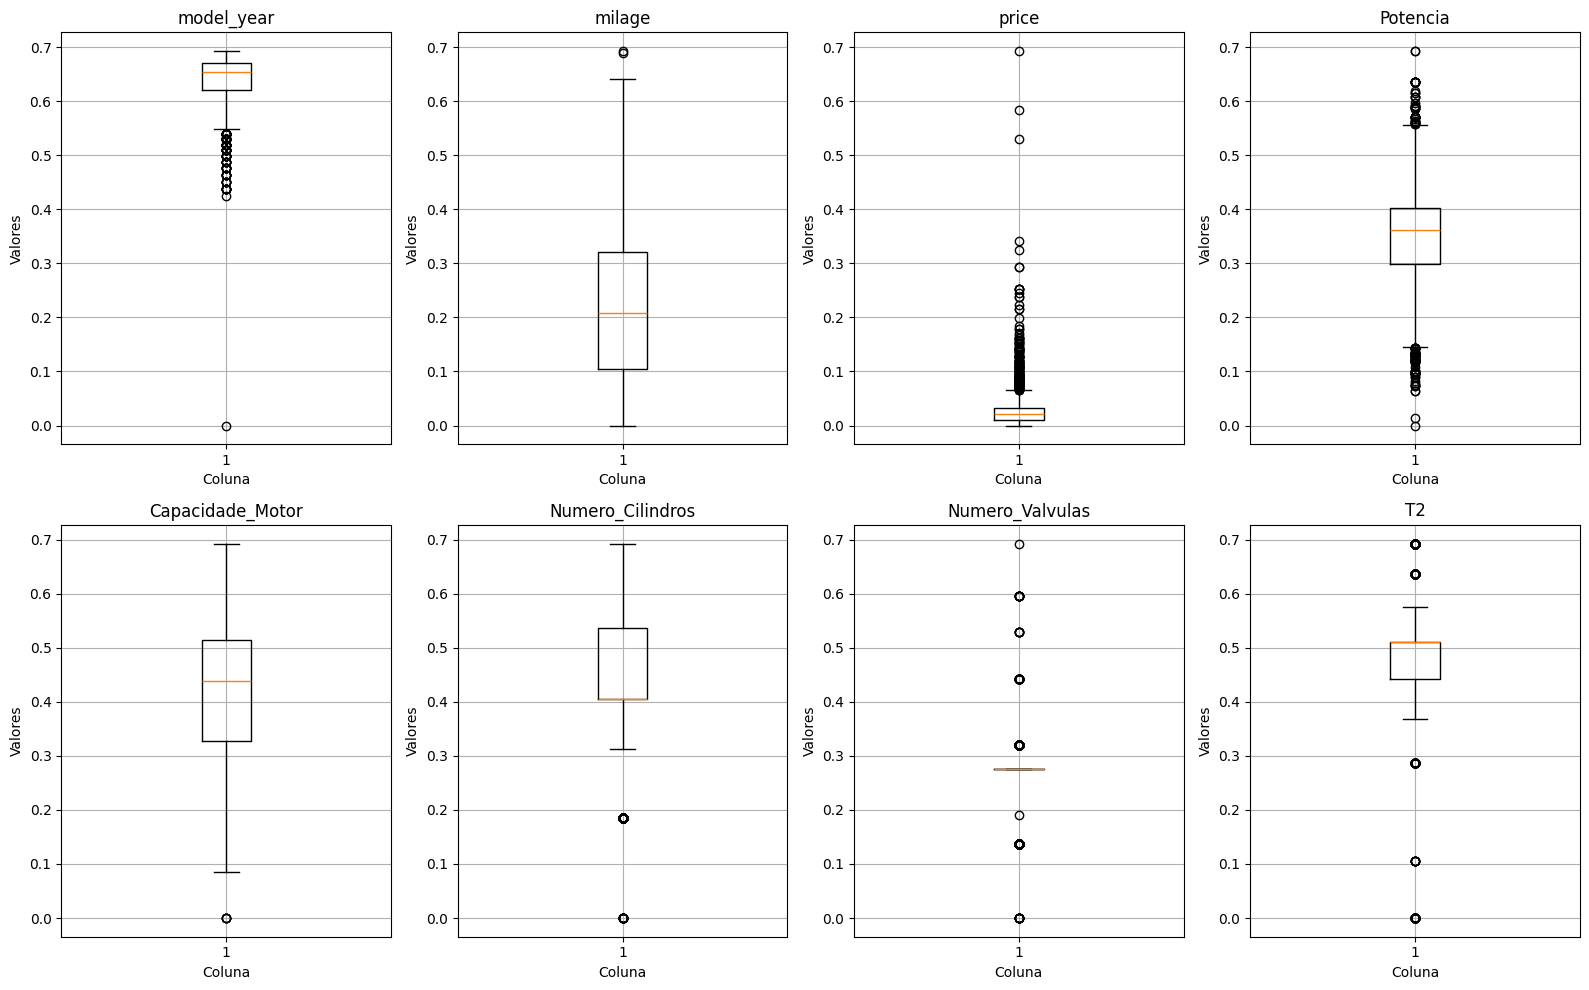

In [99]:
woo = data1.drop(['outlier'], axis=1) # nova variável para fazer o modelo sem os outliers
import numpy as np
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas
colunas_numericas = woo.select_dtypes(include=np.number)

num_linhas = 2
num_colunas = 4
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(16, 10))

for i, coluna in enumerate(colunas_numericas.columns):
    linha = i // num_colunas
    coluna_atual = i % num_colunas
    axs[linha, coluna_atual].boxplot(colunas_numericas[coluna])
    axs[linha, coluna_atual].set_title(f'{coluna}')
    axs[linha, coluna_atual].set_xlabel('Coluna')
    axs[linha, coluna_atual].set_ylabel('Valores')
    axs[linha, coluna_atual].grid(True)

plt.tight_layout()
plt.show()

# subset 2

pegar no subset 1 e juntar características de uso (accident, clean_title) e fuel_type
- Susbtituir valores nulos e '-' por desconhecido
- Substituição de valores nulos da coluna 'fuel_type' por Eletric
- Mantém colunas adicionais (Potencia, Capacidade_Motor, Numero_Cilindros, Numero_Valvulas)
- Remoção de Outliers por LOF
- Criação de uma variavel Classificação para os preços

In [109]:
data2=p

### NULL's substitution

### Fuel Type (substituir '-' por desconhecido)

In [110]:
data2['fuel_type'].unique()
data2['fuel_type'].isnull().sum()
data2['fuel_type'].fillna('Eletric', inplace=True)
data2['fuel_type'] = data2['fuel_type'].replace('–', 'desconhecido')

C:\Users\elisa\AppData\Local\Temp\ipykernel_13672\2341822197.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['fuel_type'].fillna('Eletric', inplace=True)


#### ENGINE clone

In [111]:
m = data2['Numero_Valvulas'].median()
m2 = data2['Numero_Cilindros'].median()
m3 = data2['Potencia'].median()
m4 = data2['Capacidade_Motor'].median()

data2['Numero_Valvulas'].fillna(m, inplace=True)
data2['Numero_Cilindros'].fillna(m2, inplace=True)
data2['Potencia'].fillna(m3, inplace=True)
data2['Capacidade_Motor'].fillna(m4, inplace=True)

C:\Users\elisa\AppData\Local\Temp\ipykernel_13672\3167162390.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['Numero_Valvulas'].fillna(m, inplace=True)
C:\Users\elisa\AppData\Local\Temp\ipykernel_13672\3167162390.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

#### accident + engine + transmission + ex_col + int_col

In [112]:
data2['accident'].fillna('desconhecido', inplace=True)
data2['engine'] = data2['engine'].replace('–', 'desconhecido')
data2['transmission'] = data2['transmission'].replace('–', 'desconhecido')
data2['ext_col'] = data2['ext_col'].replace('–', 'desconhecido')
data2['int_col'] = data2['int_col'].replace('–', 'desconhecido')


C:\Users\elisa\AppData\Local\Temp\ipykernel_13672\3677287092.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['accident'].fillna('desconhecido', inplace=True)


#### Clean Title

In [113]:
data2['clean_title'] = data2['clean_title'].fillna('No')

In [114]:
data2.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col             0
int_col             0
accident            0
clean_title         0
price               0
Potencia            0
Capacidade_Motor    0
Numero_Cilindros    0
Numero_Valvulas     0
T2                  0
outlier             0
dtype: int64

### Normalização

In [115]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform the features
data2[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'milage']] = scaler.fit_transform(data2[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas' ,'milage']])


### Remoção de Ouliers - LOF

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

nums = data2.select_dtypes(include=[np.number])
lof = LocalOutlierFactor(n_neighbors=20, novelty=False, contamination=0.05)
y_pred = lof.fit_predict(nums)
data2['outlier'] = y_pred
out = data2[data2['outlier']==-1]
# len(out) # 161 outliers
out.describe()

outlier_indices = data2[data2['outlier'] == -1].index
o=(data2.loc[outlier_indices]).head()
o.describe() # dados outliers
criteria = data2['outlier'] == -1
clean_data = data2[~criteria] # dataframe sem outliers
clean_data.columns
ck2 = clean_data.drop(['outlier'], axis=1) # nova variável para fazer o modelo sem os outliers
ck2.head()


### Nova Categoria para os preços

In [ ]:
min_value = ck2['price'].min() #0.0
max_value = ck2['price'].max() # 0.25336347250399127

import numpy as np
bins = np.linspace(min_value,max_value,6) # econômico, médio-baixo, médio, médio-alto, alto 
bins

In [ ]:
labels = ['econômico','médio-baixo','médio','médio-alto','alto']

In [ ]:
ck2['Classificação_Preco'] = pd.cut(ck2['price'], bins=bins, labels=labels, include_lowest=True)
ck2.head(5)

In [ ]:
import matplotlib.pyplot as plt
plt.hist(ck2['Classificação_Preco'], bins=20)

In [ ]:
ck2['Classificação_Preco'].value_counts()

# Regressão Linear 1

(características do carro (só com variáveis numéricas)) do subset 1


### Separar Data / Treinar e Avaliar Algoritmos

In [100]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
# from sklearn import datasets
# from slickml.metrics import (
#     RegressionMetrics,
# )  # downloaded from https://github.com/slickml/slick-ml # btw pip install slickml
from matplotlib import pyplot as plt
# import shap

In [116]:
# selecionar as colunas necessárias a partir do df SEM OUTLIERS
ck1=ck.loc[:, ['model_year', 'price', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]
X = ck1.drop(['price'], axis=1) 
y = ck1['price'] 

In [102]:
X = pd.get_dummies(X, drop_first=True) # para var. categóricas
# Option 1: Fill missing values, for example with the median or mean
X.fillna(X.median(), inplace=True)

# Option 2: Drop rows with missing values
X.dropna(inplace=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [104]:
# Make predictions
y_pred = model.predict(X_test)

In [105]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.00020002992668082927
Mean Absolute Error: 0.008273598136028744
R-squared: 0.384844773768773


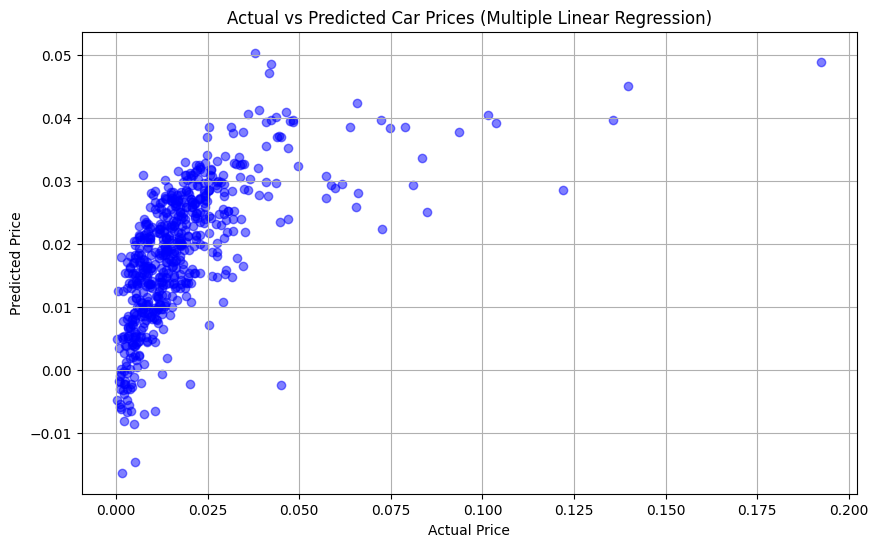

In [106]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Car Prices (Multiple Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


#### RANDOM FOREST

In [107]:
# train and predict with Random Forest Regressor
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
pred = RF.predict(X_test)

In [108]:
# Regression metrics for Random Forest
from slickml.metrics import RegressionMetrics

reg_metrics = RegressionMetrics(y_test, pred)
reg_metrics.plot()

ModuleNotFoundError: No module named 'slickml'

# CORRELATION

In [ ]:
import seaborn as sns

dados_numericos = data.select_dtypes(include=['number'])
correlation_matrix = dados_numericos.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# preço está bastante correlacionado com potência e ano de fábrico

correlação p/ preço/nº valvulas diminui muito quando se substitui NaN (0.51 para 0.11)

# Regressão Linear 2

In [127]:
# selecionar as colunas necessárias a partir do df SEM OUTLIERS
ck3=ck.loc[:, ['model_year', 'price', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'fuel_type', 'accident', 'clean_title']]
X = ck3.drop(['price'], axis=1) 
y = ck3['price'] 

In [128]:
X = pd.get_dummies(X, drop_first=True) # para var. categóricas
# Option 1: Fill missing values, for example with the median or mean
# X.fillna(X.median(), inplace=True)

# Option 2: Drop rows with missing values
# X.dropna(inplace=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [130]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.00019698913613419385
Mean Absolute Error: 0.008222153824166167
R-squared: 0.3941961654713855


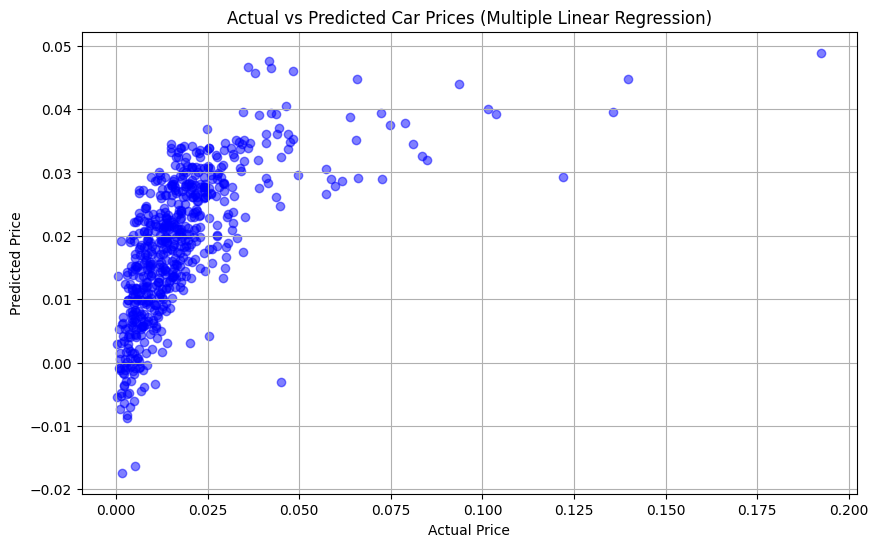

In [131]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Car Prices (Multiple Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

erro um pouco menor do que R1

#### CORES

In [ ]:
def simplify_color(color):
    return color.split()[0]

# Aplicar a função à coluna 'Cor'
p['simp_int_col'] = p['int_col'].apply(simplify_color)
p['simp_ext_col'] = p['ext_col'].apply(simplify_color) # de 265 p/ 191
# n vale a pena

# DR -> Subset 2

### Dividir o dataset em treino e teste

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
from sklearn import datasets
from slickml.metrics import (
    RegressionMetrics,
)   # downloaded from https://github.com/slickml/slick-ml
from matplotlib import pyplot as plt
#import shap

In [132]:
X = ck2.drop(['price'], axis=1)  # sem os outliers 
y = ck2['price'] 

### Coverter categorico -> Numerico

In [133]:
from sklearn.preprocessing import OneHotEncoder

# Crie uma instância do codificador com handle_unknown='ignore'
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# Ajuste e transforme todas as variáveis categóricas no conjunto de dados completo
X_encoded = encoder.fit_transform(X)


In [134]:
# Divida os dados transformados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_tr_encoded, X_ts_encoded, y_tr, y_ts = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [135]:
DT = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
DT.fit(X_tr_encoded, y_tr)
pred3 = DT.predict(X_ts_encoded)

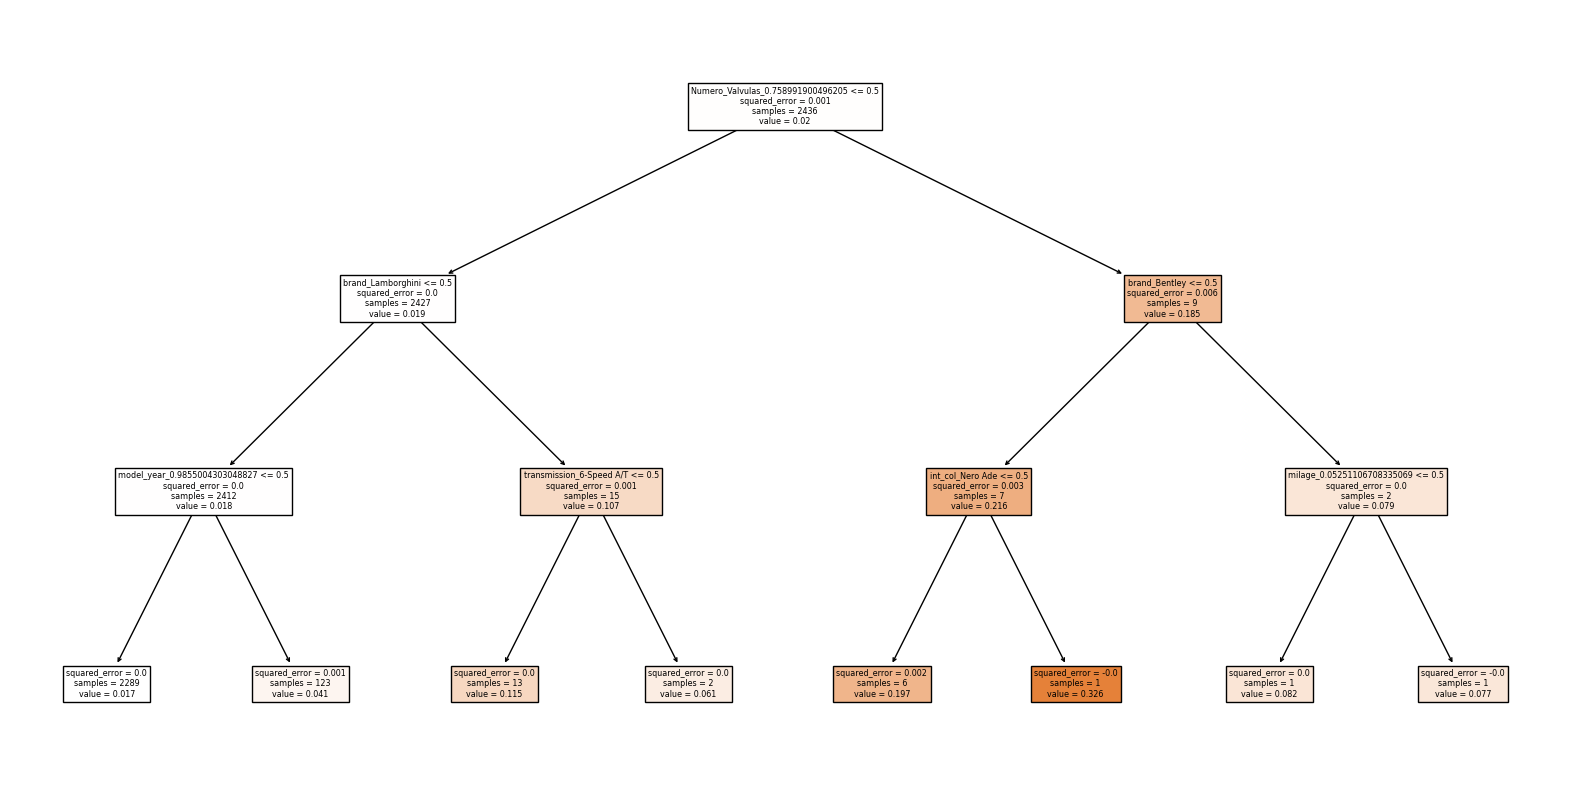

In [136]:
plt.figure(figsize=(20,10))
tree.plot_tree(DT, filled=True, feature_names=encoder.get_feature_names_out())
plt.show()

In [ ]:
# Regression metrics for Decision Tree
reg_metrics3 = RegressionMetrics(y_ts, pred3)
reg_metrics3.plot()